IMPORT ALL THE PACKAGES

In [1]:
# Importing packages we need
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

Load data set

In [2]:

#resource used: https://www.kaggle.com/datasets/shayannaveed/credit-card-fraud-detection
#Read the dataset
datapath = os.path.join("creditcard","")
training_data = pd.read_csv(datapath +'creditcard.csv')


Data Processing

In [3]:
print(training_data.groupby(['Class']).size())
training_data

Class
0    284315
1       492
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Data Standarization

In [4]:
norm=StandardScaler()
#normalizing Amount column of training dataset
amt=training_data['Amount'].to_numpy() 
training_data['Amount']=norm.fit_transform(amt.reshape(-1,1))
#normalizing Time column of training datase
t=training_data['Time'].to_numpy()
training_data['Time']=norm.fit_transform(t.reshape(-1,1))
#print
training_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

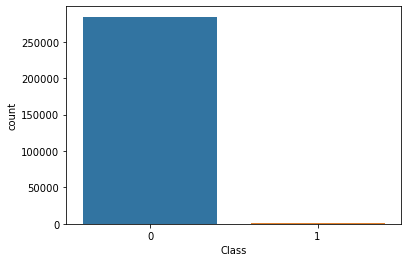

In [6]:
#plot Normal class and Fraud class
axs = sns.countplot(x ="Class", data = training_data)


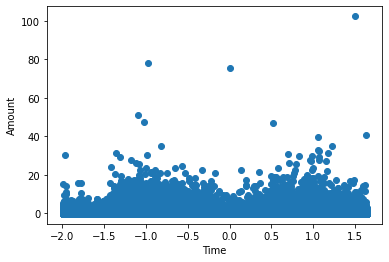

In [7]:
#plot Time vs Amount
plt.scatter(training_data["Time"], training_data["Amount"])
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

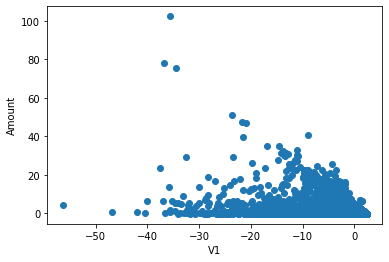

In [8]:
#V1 vs Amount
plt.scatter(training_data["V1"], training_data["Amount"])
plt.xlabel("V1")
plt.ylabel("Amount")
plt.show()

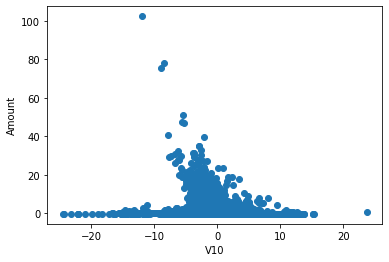

In [9]:
#V10 vs Amount
plt.scatter(training_data["V10"], training_data["Amount"])
plt.xlabel("V10")
plt.ylabel("Amount")
plt.show()

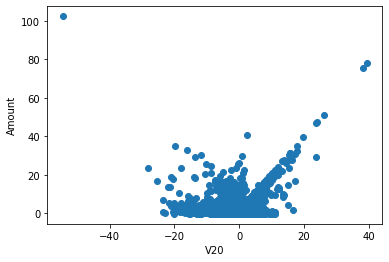

In [10]:
#V20 vs Amount
plt.scatter(training_data["V20"], training_data["Amount"])
plt.xlabel("V20")
plt.ylabel("Amount")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


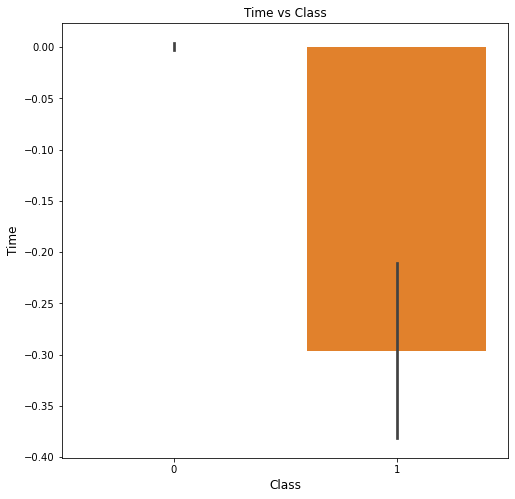

In [11]:
#Plot bargraph Time Vs Class
plt.figure(figsize = (8, 8))
sns.barplot(training_data.Class, training_data.Time)
plt.xlabel("Class",  fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title('Time vs Class')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


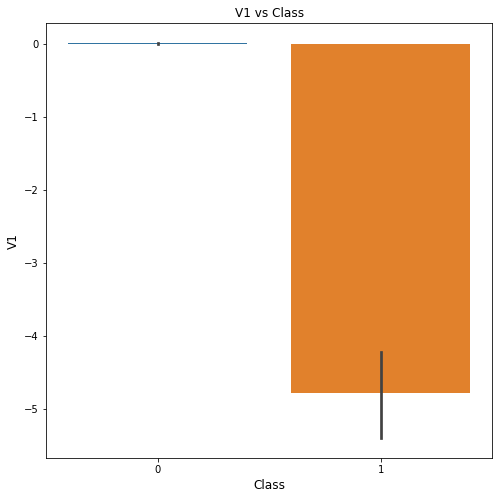

In [12]:
plt.figure(figsize = (8, 8))
sns.barplot(training_data.Class, training_data.V1)
plt.xlabel("Class",  fontsize=12)
plt.ylabel("V1", fontsize=12)
plt.title('V1 vs Class')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


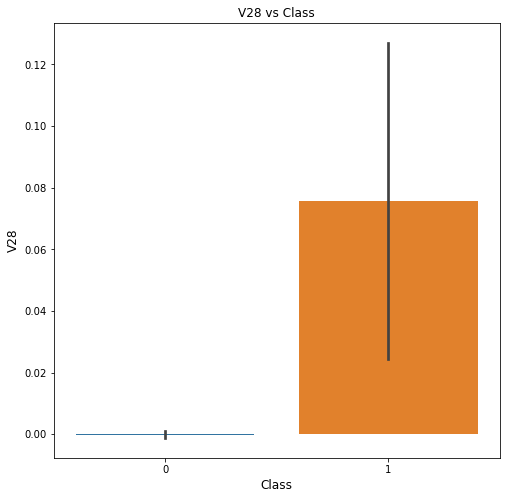

In [13]:
plt.figure(figsize = (8, 8))
sns.barplot(training_data.Class, training_data.V28)
plt.xlabel("Class",  fontsize=12)
plt.ylabel("V28", fontsize=12)
plt.title('V28 vs Class')
plt.show()

Lets plot feature density

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

<Figure size 432x288 with 0 Axes>

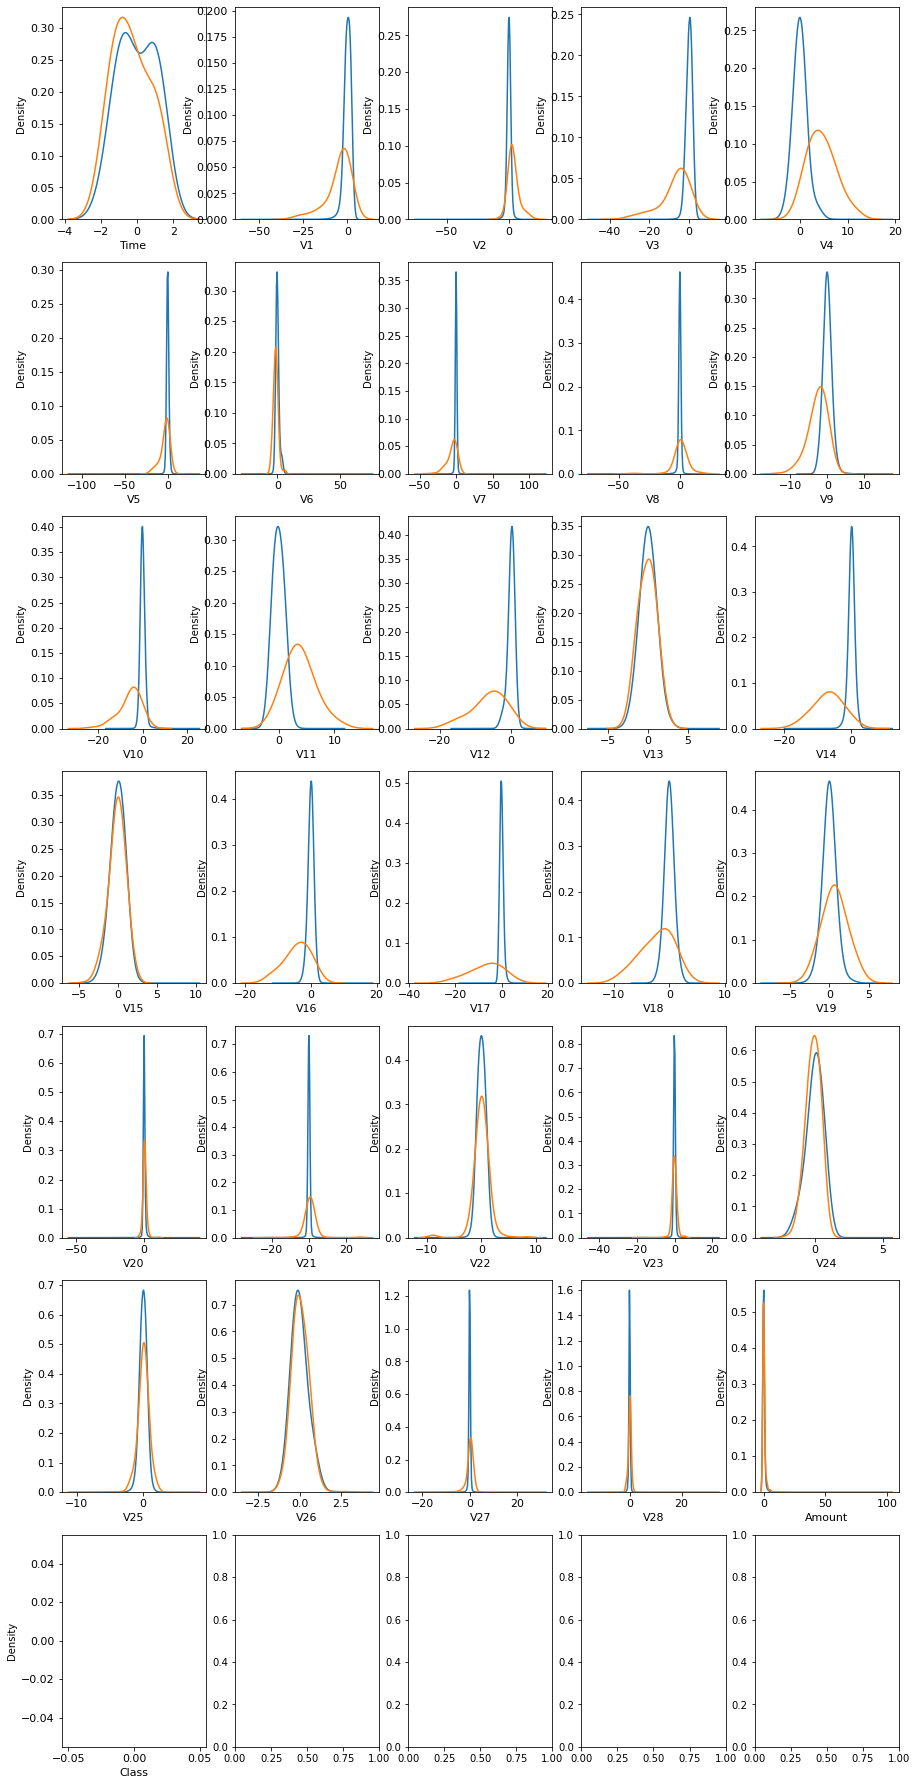

In [14]:
#plot feature density.
#resource used: https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models/notebook
#thank you for helping to build below code.
var_dens = training_data.columns.values
Normal = training_data.loc[training_data["Class"] == 0]
Fraud = training_data.loc[training_data["Class"] == 1]
plt.figure()
figu, sub = plt.subplots(7, 5, figsize = (15, 32))
y=1
for x in var_dens:
 
    plt.subplot(7, 5, y)
    sns.kdeplot(Normal[x], bw = 0.6, label = "Class = 0")
    sns.kdeplot(Fraud[x], bw = 0.6, label = "Class = 1")
    plt.xlabel(x, fontsize=11)
    plt.tick_params(axis='both', which='major', labelsize=11)
    y += 1
plt.show()  

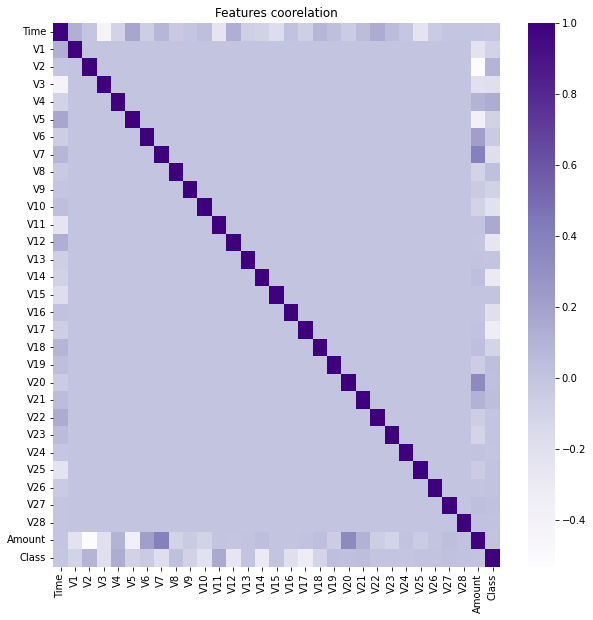

In [15]:
#plot feature corelation
plt.figure(figsize = (10, 10))
var = training_data.corr()
x = var.columns
y = var.columns
sns.heatmap(var, xticklabels = x , yticklabels = y, cmap = "Purples")
plt.title("Features coorelation")
plt.show()

Split the data

In [16]:
#Dividing the data set into X_data and y_data for training process.
X_data=training_data.iloc[:,:30]
y_data=training_data['Class']

In [17]:
#Divide the data into train and test
# 70% training and 30% test
X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

IMPORT USEFUL PACKAGES

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn import metrics
from numpy import sort

FITTING THE MODEL WITH TRAINING DATASET

In [19]:
#Training the model
xg_opt = XGBClassifier()

xg_opt.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:58:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Predicting the model. Finding Train and Test Accuracy.

In [20]:
predictions = xg_opt.predict(X_test)
train_accu = xg_opt.score(X_train, y_train)
test_accu = accuracy_score(y_test, predictions)
print("Train accuracy:", train_accu)
print("Test accuracy:", test_accu)

Train accuracy: 1.0
Test accuracy: 0.9996722961506501


XGBOOST Classifier has an API for feature importance. Lets see some of them.

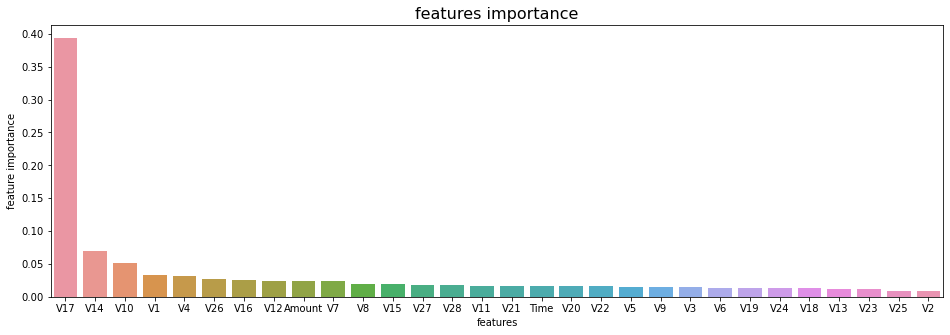

In [21]:
#resource used: https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models?scriptVersionId=58445497&cellId=63
# thank you for helping to wright below code
feat_imp = pd.DataFrame({'features': X_train.columns, 'feature importance': xg_opt.feature_importances_})
feat_imp = feat_imp.sort_values(by='feature importance',ascending=False)
plt.figure(figsize = (16,5))
plt.title('features importance',fontsize=16)
sns.barplot(x='features',y='feature importance',data=feat_imp)
plt.show()   

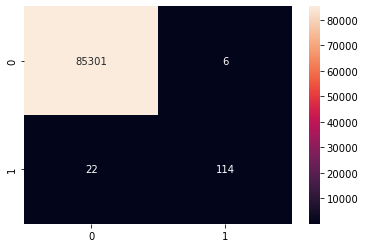

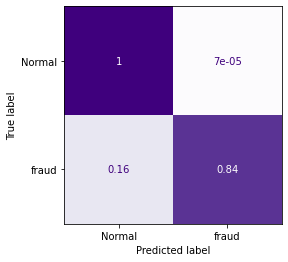

In [22]:
# Plot confusinon metrix
# resource used: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='d')
plot_confusion_matrix(xg_opt, X_test, y_test, display_labels=['Normal','fraud'], colorbar=False, cmap='Purples', normalize='true', values_format='.2g')


Classification metrices

In [23]:
Classes = ['Normal','Fraud']
print(classification_report(y_test, predictions, target_names=Classes))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85307
       Fraud       0.95      0.84      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443



Plot ROC curve. 
ROC cure repersent better way of evaluating model. 
For normal class we are getting 100% result, this is because normal data are large in number

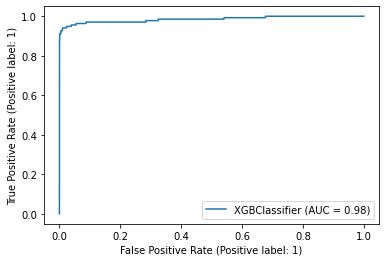

In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
#thank you for below library
metrics.plot_roc_curve(xg_opt, X_test, y_test) 
plt.show()

Here, total fraud is 98 and not detected is 20. So we need to focus on detecting as much fraud as we can

Downsampling the normal transactions.

In [25]:
# function to equalize the number of fraud and normal samples
def cut(data):
    fraud_count, benign_count = data['Class'].value_counts()
    shuffled_training = training_data.sample(frac=1)
    fraud = shuffled_training.loc[shuffled_training['Class'] == 1].sample(n=benign_count)
    benign = shuffled_training.loc[shuffled_training['Class'] == 0].sample(n=benign_count)
    
    return pd.concat([fraud, benign])

training_data2 = cut(training_data)

# Seperate X and Y values
x_train_b = training_data2.drop('Class', axis=1)
y_train_b = training_data2['Class']
print(y_train_b.value_counts())

1    492
0    492
Name: Class, dtype: int64


Visualization of data after downsampling

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


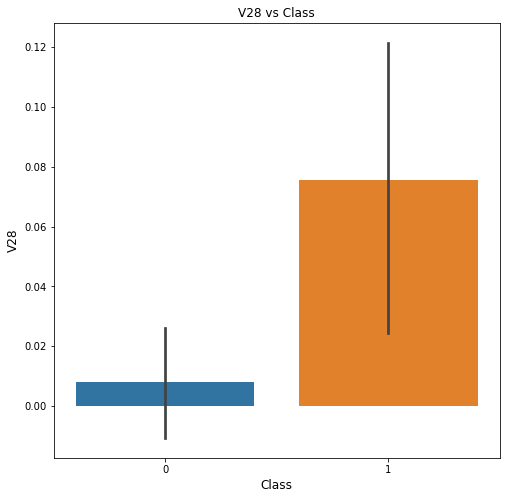

In [26]:
plt.figure(figsize = (8, 8))
sns.barplot(training_data2.Class, training_data2.V28)
plt.xlabel("Class",  fontsize=12)
plt.ylabel("V28", fontsize=12)
plt.title('V28 vs Class')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


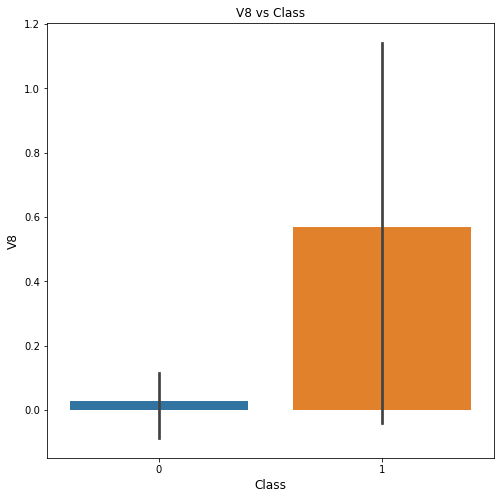

In [27]:
plt.figure(figsize = (8, 8))
sns.barplot(training_data2.Class, training_data2.V8)
plt.xlabel("Class",  fontsize=12)
plt.ylabel("V8", fontsize=12)
plt.title('V8 vs Class')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


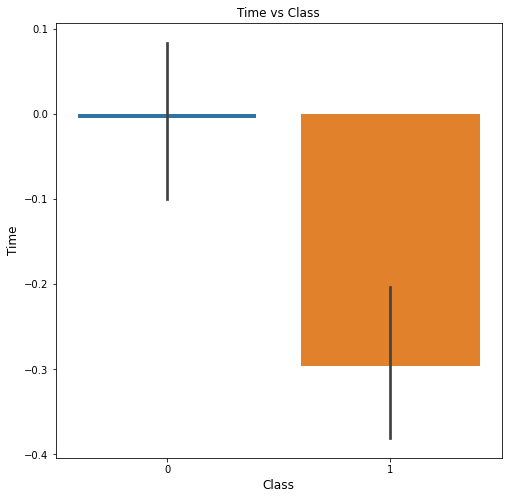

In [28]:
plt.figure(figsize = (8, 8))
sns.barplot(training_data2.Class, training_data2.Time)
plt.xlabel("Class",  fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title('Time vs Class')
plt.show()

In [29]:
#Divide the data into train and test
# 70% training and 30% test
X_tra,X_tes,y_tra,y_tes = train_test_split(x_train_b, y_train_b, test_size=0.3, random_state=42)

In [30]:
#train the model with balance data set
xg_blc = XGBClassifier()
xg_blc.fit(X_tra, y_tra)

[13:01:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
pred = xg_blc.predict(X_tes)
train_accuracy = xg_blc.score(X_tra, y_tra)
test_accuracy = accuracy_score(y_tes, pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 1.0
Test accuracy: 0.9425675675675675


Features Importance

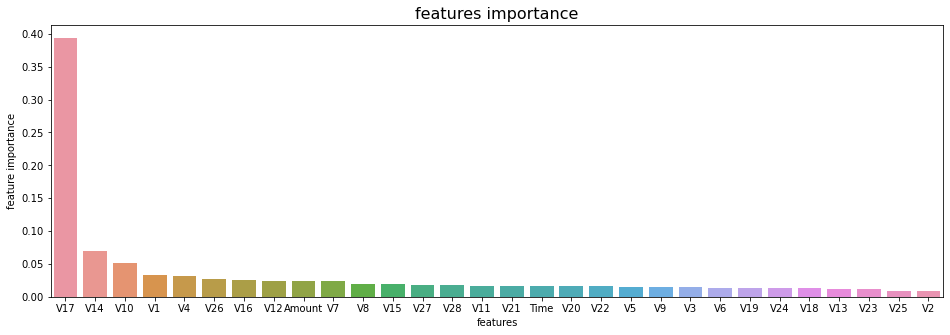

In [32]:
#resource used: https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models?scriptVersionId=58445497&cellId=63
# thank you for helping to wright below code
feat_imp2 = pd.DataFrame({'features': X_train.columns, 'feature importance': xg_blc.feature_importances_})
feat_imp2 = feat_imp.sort_values(by='feature importance',ascending=False)
plt.figure(figsize = (16,5))
plt.title('features importance',fontsize=16)
sns.barplot(x='features',y='feature importance',data=feat_imp2)
plt.show()  

In [33]:
print(y_tes.value_counts())

1    150
0    146
Name: Class, dtype: int64


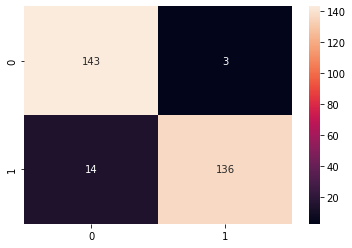

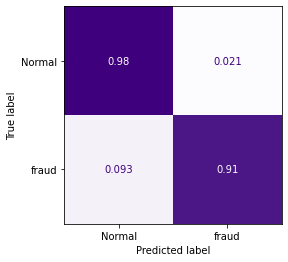

In [34]:
# Plot confusinon metrix
# resource used: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix2 = confusion_matrix(y_tes, pred)
sns.heatmap(cf_matrix2, annot=True, fmt='d')
plot_confusion_matrix(xg_blc, X_tes, y_tes, display_labels=['Normal','fraud'], colorbar=False, cmap='Purples', normalize='true', values_format='.2g')


In [35]:
print(classification_report(y_tes, pred, target_names=Classes ))

              precision    recall  f1-score   support

      Normal       0.91      0.98      0.94       146
       Fraud       0.98      0.91      0.94       150

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



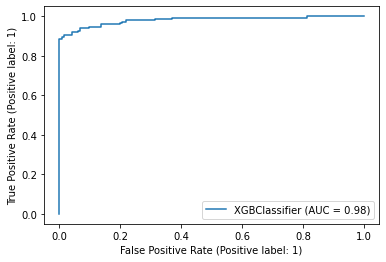

In [36]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
#thank you for below library
metrics.plot_roc_curve(xg_blc, X_tes, y_tes) 
plt.show()

Lets see with logistic regression

In [37]:
#Use Logestic regression model for full data sample
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C=0.2, max_iter=1000, multi_class='ovr', penalty='l2',
                   random_state=0, solver='liblinear', tol=0.001)

#Train on split data and get training accuracy
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test) 
model1.score(X_test, y_test)

0.9992743700478681

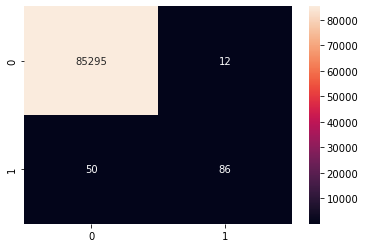

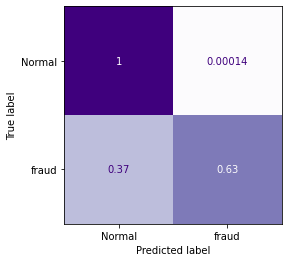

In [38]:
# Results Plots
# Confusion Matrix (resource used: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
cf_matrix4 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cf_matrix4, annot=True, fmt='d')
plot_confusion_matrix(model1, X_test, y_test, display_labels=['Normal','fraud'], colorbar=False, cmap='Purples', normalize='true', values_format='.2g')



In [39]:
#Use Logestic regression model after downsampling
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(C=0.2, max_iter=1000, multi_class='ovr', penalty='l2',
                   random_state=0, solver='liblinear', tol=0.001)

#Train on split data and get training accuracy
model2.fit(X_tra, y_tra)
y_pred2 = model2.predict(X_tes) 
model2.score(X_tes, y_tes)

0.9527027027027027

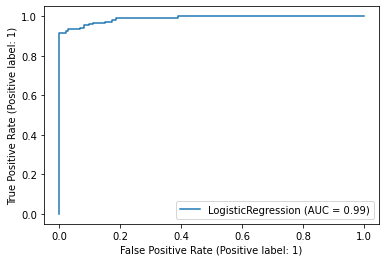

In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
#thank you for below library
metrics.plot_roc_curve(model2, X_tes, y_tes) 
plt.show()

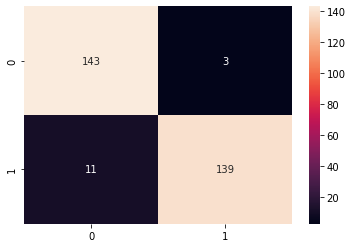

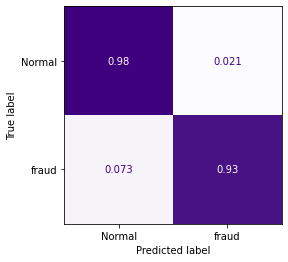

In [41]:
# Results Plots
# Confusion Matrix (resource used: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
cf_matrix3 = confusion_matrix(y_tes, y_pred2)
sns.heatmap(cf_matrix3, annot=True, fmt='d')
plot_confusion_matrix(model2, X_tes, y_tes, display_labels=['Normal','fraud'], colorbar=False, cmap='Purples', normalize='true', values_format='.2g')



In [42]:

print(classification_report(y_tes, y_pred2, target_names=Classes))

              precision    recall  f1-score   support

      Normal       0.93      0.98      0.95       146
       Fraud       0.98      0.93      0.95       150

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



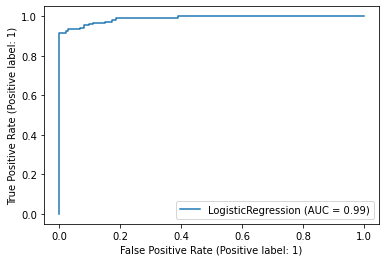

In [43]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
#thank you for below library
metrics.plot_roc_curve(model2, X_tes, y_tes) 
plt.show()

*Use Random Forest*

In [44]:
from sklearn.ensemble import RandomForestClassifier
#train the model and print training and test accuracy
#without downsampling
modelr1 = RandomForestClassifier()
modelr1.fit(X_train, y_train)
y_predr1 = modelr1.predict(X_test) 
print("Test accuracy:", modelr1.score(X_test, y_test))
print("Train accuracy:", modelr1.score(X_train, y_train))

Test accuracy: 0.9996371850239341
Train accuracy: 1.0


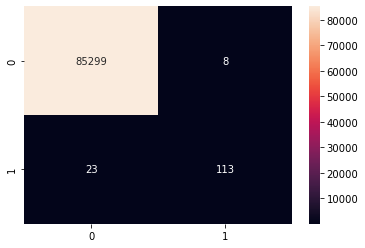

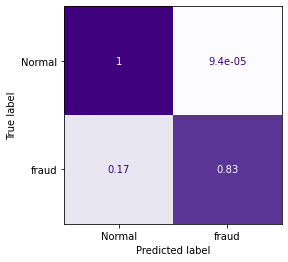

In [45]:
# Results Plots
# Confusion Matrix (resource used: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
cf_matrix5 = confusion_matrix(y_test, y_predr1)
sns.heatmap(cf_matrix5, annot=True, fmt='d')
plot_confusion_matrix(modelr1, X_test, y_test, display_labels=['Normal','fraud'], colorbar=False, cmap='Purples', normalize='true', values_format='.2g')



In [46]:
print(classification_report(y_test, y_predr1, target_names=Classes))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85307
       Fraud       0.93      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



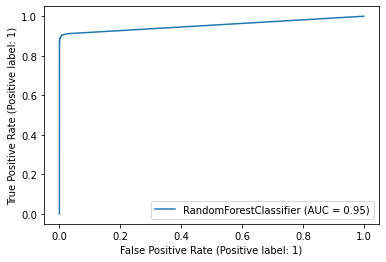

In [47]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
#thank you for below library
metrics.plot_roc_curve(modelr1, X_test, y_test) 
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
#train the model and print training and test accuracy
#with downsampling
modelr2 = RandomForestClassifier()
modelr2.fit(X_tra, y_tra)
y_predr2 = modelr2.predict(X_tes) 
print("Test accuracy:", modelr2.score(X_tes, y_tes))
print("Train accuracy:", modelr2.score(X_tra, y_tra))

Test accuracy: 0.9459459459459459
Train accuracy: 1.0


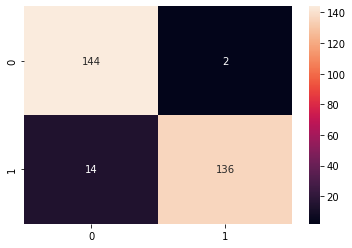

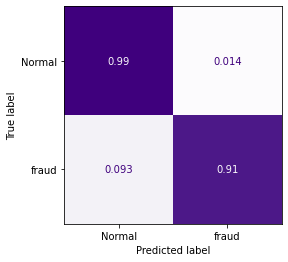

In [49]:
# Results Plots
# Confusion Matrix (resource used: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
cf_matrix6 = confusion_matrix(y_tes, y_predr2)
sns.heatmap(cf_matrix6, annot=True, fmt='d')
plot_confusion_matrix(modelr2, X_tes, y_tes, display_labels=['Normal','fraud'], colorbar=False, cmap='Purples', normalize='true', values_format='.2g')


In [50]:
print(classification_report(y_tes, y_predr2, target_names=Classes))

              precision    recall  f1-score   support

      Normal       0.91      0.99      0.95       146
       Fraud       0.99      0.91      0.94       150

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



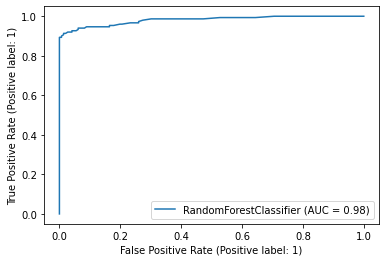

In [51]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
#thank you for below library
metrics.plot_roc_curve(modelr2, X_tes, y_tes) 
plt.show()